In [45]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.gridspec import GridSpec
import pylab
import hickle as hkl

from InflGame.adaptive.visualization import Shell
import InflGame.utils.general as general
import InflGame.domains.rd as rd

In [46]:
import numpy as np

In [47]:
domain_bounds=np.array([[0,5],[0,5]])
np.shape(domain_bounds)

(2, 2)

In [48]:
domain_type='2d'
domain_bounds=np.array([[0,5],[0,5]])
font_size_labels=18
font_size_title=20
domain_refinement=20
rect_Y, rect_X = np.mgrid[domain_bounds[0,0]:domain_bounds[0,1]:domain_refinement*1j, domain_bounds[1,0]:domain_bounds[1,1]:domain_refinement*1j]
rect_positions = np.vstack([rect_X.ravel(), rect_Y.ravel()])
rect_positions=rect_positions.transpose()
fig = plt.figure(figsize=(19, 7))
gs = GridSpec(nrows=1, ncols=1,width_ratios=[1],wspace=0.0, hspace=0.2, top=1, bottom=0.05, left=0.17, right=0.845)
ax0 = fig.add_subplot(gs[:, 0])
ax0.set_box_aspect(1)
current_alpha=5
resource_parameters_MVG=[torch.tensor([[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1]],[[1,0],[0,1.0]]]),torch.tensor([[0,0],[current_alpha,0],[0, current_alpha],[current_alpha,current_alpha]])]
resource_type='multi_modal_gaussian_distribution_2D_square'

resources=rd.resource_distribution_choice(bin_points=rect_positions,resource_type=resource_type,resource_parameters=resource_parameters_MVG)
pval=resources.reshape(len(rect_Y),len(rect_X))
im = ax0.pcolormesh(rect_X,rect_Y, pval)

# Make the plot square
ax0.set_box_aspect(1) 
plt.title('Resource distribution',fontsize=font_size_title)
plt.xlabel('x-loc',fontsize=font_size_labels)
plt.ylabel('y-loc',fontsize=font_size_labels)

ax1 = fig.add_subplot(gs[:, 0])
cbar=fig.colorbar(im,ax=ax1, extend='max',location='right',ticklocation='left')
ax1.yaxis.set_ticks_position('left')
ax1.set_box_aspect(.1)
ax1.axis('off')

ax2 = fig.add_subplot(gs[:, 0])
ax2.axis('off')
ax2.set_box_aspect(.1)
ax2.set_title('Resource Density',x=.82, y=0, rotation = 90,size=font_size_labels)
# Add a colorbar


plt.close()

fig.savefig('2d_square_alpha_1.svg',bbox_inches='tight')

## Setup:The enviroment and adapative enviroment

The cell below sets up the outer shell for visualizing the the adapative enviroment. 

In [49]:
num_agents=8
infl_configs={"infl_type":"multi_gaussian"}
domain_type='2d'
int_agents_pos=general.agent_position_setup(num_agents=num_agents,setup_type="initial_symmetric_setup",domain_type=domain_type,domain_bounds=domain_bounds)
#int_agents_pos=[[7.5,7.5],[7.5,7.5],[7.5,7.5],[7.5,7.5]] 
parameters=general.agent_parameter_setup(num_agents=num_agents,infl_type=infl_configs["infl_type"],setup_type="initial_symmetric_setup",reach=[[3,0],[0,3]])
#parameters=torch.tensor([[[.1,0],[0,.1]],[[.1,0],[0,.1]],[[.1,0],[0,.1]],[[.1,0],[0,.1]]])
bin_points=rect_positions
resource_distribution=resources
lr_type='cosine_annealing' #static or cosine
learning_rate=[1/50,1/10,250]
time_steps=2000

vis=Shell(num_agents=num_agents, agents_pos=int_agents_pos.clone(), parameters=parameters,resource_distribution=resource_distribution,bin_points=bin_points,
          infl_configs=infl_configs,learning_rate_type=lr_type,learning_rate=learning_rate,time_steps=time_steps,domain_type=domain_type,domain_bounds=domain_bounds,resource_type=resource_type,domain_refinement=domain_refinement,tolerance=.000001,ignore_zero_infl=True)

In [50]:
vis.setup_adaptive_env()
vis.field.gradient_ascent()
og_pos_matrix=vis.field.pos_matrix.clone()
og_grad_matrix=vis.field.grad_matrix.clone()
vis.agents_pos=int_agents_pos.clone()


In [51]:
#vis.mean_stability_birfurcation_rs(r_st=.1,r_end=.5,r_points=200,s_st=0,s_end=1,s_points=100)

#vis.first_order_bifurication_plot(vis.parameters[0],resource_distribution_type="multi_modal_gaussian_distribution_2D_square",alpha_current=current_alpha,alpha_st=0,alpha_end = 5, fixed_parameters_lst=resource_parameters_MVG)

## End State plot

Shows the players influence over the resource distribution as they move via adaptive dynamics

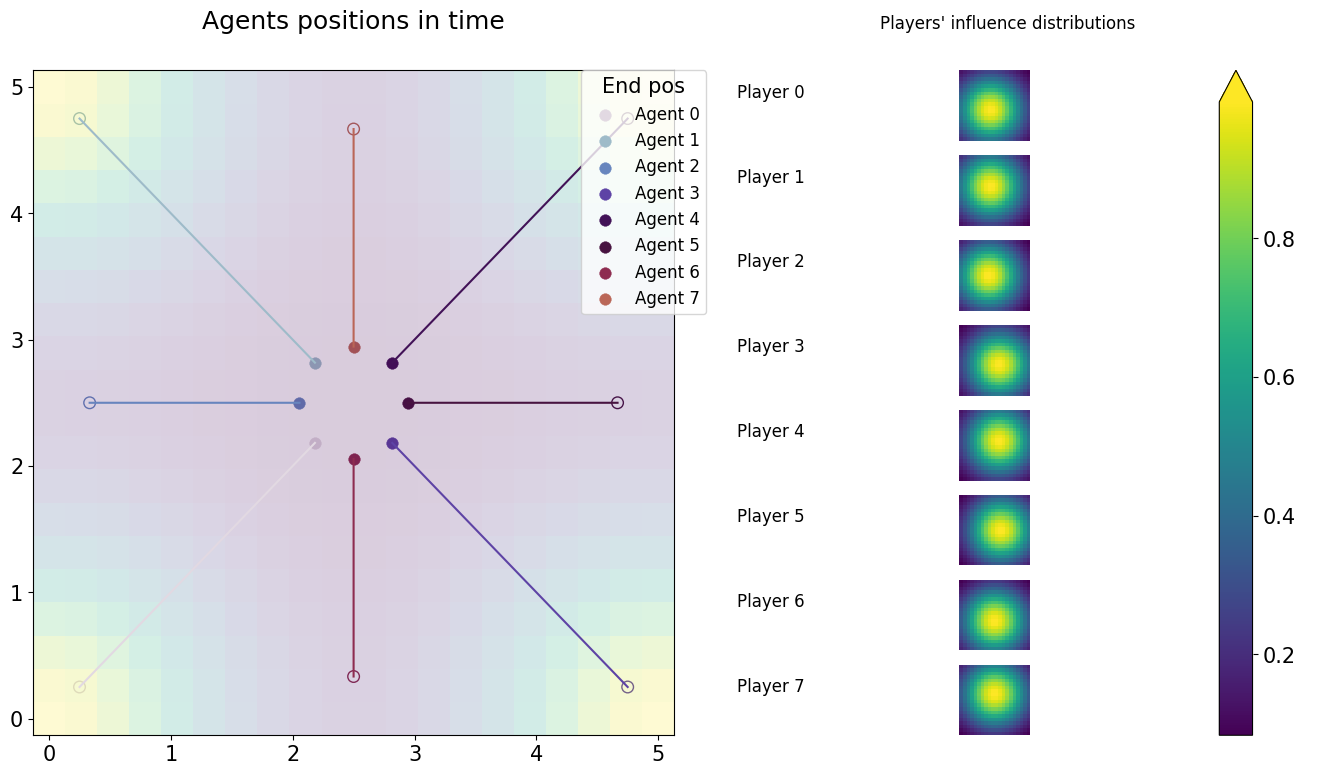

In [52]:
vis.dist_pos_gif(1)

## Gif State plot

gif of the above plot

In [53]:
#vis.vect_plot(agent_id=0,parameter_instance=vis.parameters[0],pos=vis.agents_pos)

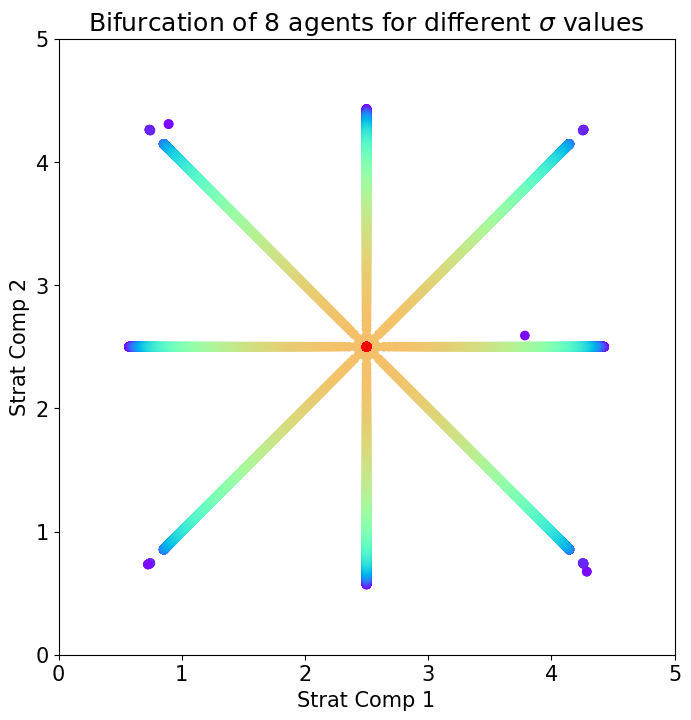

In [ ]:
test=vis.equilibrium_bifurcation_plot(reach_start=.5,
                                      reach_end=4,
                                      reach_num_points=1000,
                                      time_steps=10000,
                                      initial_pos=vis.agents_pos,
                                      name_ads=[],
                                      title_ads=[],
                                      parallel_configs={'parallel':True, 'max_workers':8, 'batch_size':4},
                                      font={'default_size': 15, 'cbar_size': 16, 'title_size': 18, 'legend_size': 12, 'font_family': 'sans-serif'},
                                      cbar_config={'center_labels': True, 'label_alignment': 'center', 'shrink': 1.0},
                                      save=True,
                                      paper_figure={'paper': True, 'section': '4_1','figure_id':'figure 7'},                                         
                                      )
vis.field.pos_matrix=og_pos_matrix.clone()
vis.field.grad_matrix=og_grad_matrix.clone()
test

In [57]:
"""

import pylab as pl
import numpy as np

a = np.array([[.5,4]])
pl.figure(figsize=(9, .5))
img = pl.imshow(a, cmap="rainbow")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
plt.title(r"$\sigma$ range")
pl.savefig("2d_colorbar.svg",bbox_inches='tight')


"""


'\n\nimport pylab as pl\nimport numpy as np\n\na = np.array([[.5,4]])\npl.figure(figsize=(9, .5))\nimg = pl.imshow(a, cmap="rainbow")\npl.gca().set_visible(False)\ncax = pl.axes([0.1, 0.2, 0.8, 0.6])\npl.colorbar(orientation="horizontal", cax=cax)\nplt.title(r"$\\sigma$ range")\npl.savefig("2d_colorbar.svg",bbox_inches=\'tight\')\n\n\n'